# Gold Price Prediction

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Gold_Price_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2290 non-null   object 
 1   SPX         2290 non-null   float64
 2   GLD         2290 non-null   float64
 3   USO         2290 non-null   float64
 4   SLV         2290 non-null   float64
 5   EUR/USD     2290 non-null   float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 125.4+ KB


In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Unnamed: 6
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692,NaN
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491,NaN
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492,NaN
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299,NaN
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099,NaN


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD,Unnamed: 6
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,0.0
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,NaN
std,519.111540,23.283346,19.523517,7.092566,0.131547,NaN
min,676.530029,70.000000,7.960000,8.850000,1.039047,NaN
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,NaN
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,NaN
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,NaN
max,2872.870117,184.589996,117.480003,47.259998,1.598798,NaN


<AxesSubplot:>

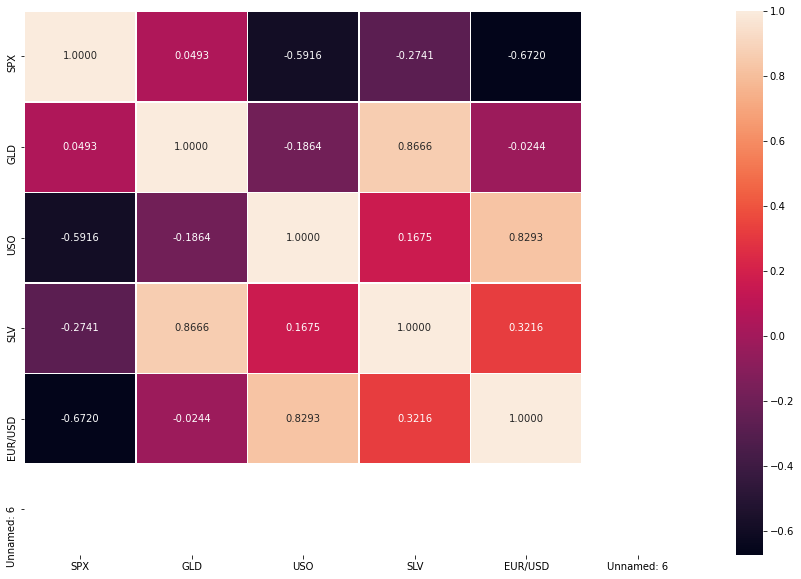

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.4f',linewidths=0.45)

In [8]:
print (corr['GLD'].sort_values(), '\n')

USO          -0.186360
EUR/USD      -0.024375
SPX           0.049345
SLV           0.866632
GLD           1.000000
Unnamed: 6         NaN
Name: GLD, dtype: float64 



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

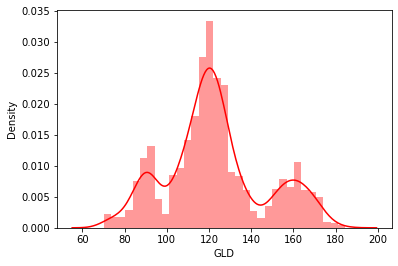

In [9]:
sns.distplot(df['GLD'], color = 'red')

In [10]:
print('Skewness:', df['GLD'].skew())

Skewness: 0.3341383472692508


In [11]:
print('Kurtosis:', df['GLD'].kurt())

Kurtosis: -0.2750805233458311


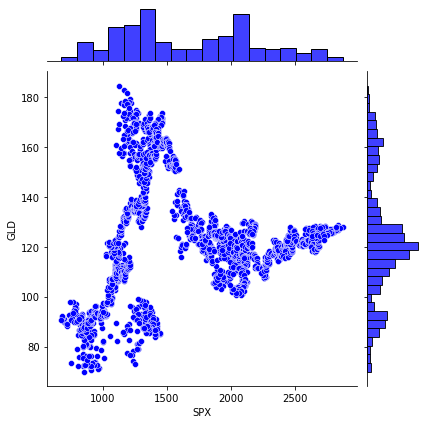

In [12]:
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'blue')

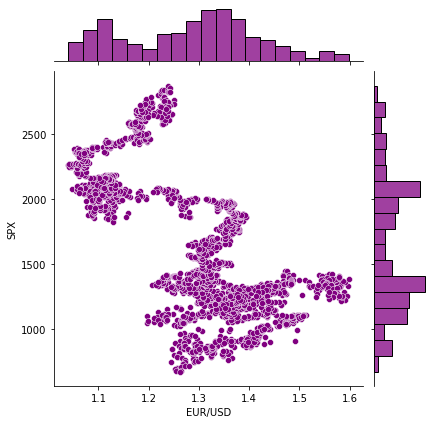

In [13]:
sns.jointplot(x =df['EUR/USD'], y = df['SPX'], color = 'purple')

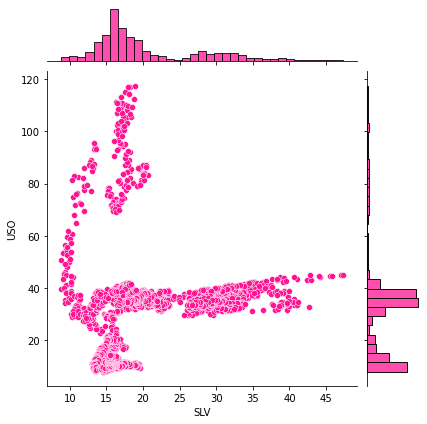

In [14]:
sns.jointplot(x =df['SLV'], y = df['USO'], color = 'deeppink')

## Using Random Forest

In [15]:
x_trail = df[['SPX','USO','SLV','EUR/USD']]
x = x_trail.iloc[:, :].values
y = df.iloc[:, 2].values

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [18]:
y_pred = regressor.predict(x_test)

In [19]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error :   1.297793151724892


In [20]:
from sklearn import metrics
print('Mean Squared Error :'," ", metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error :   5.16257387057774


In [21]:
from sklearn import metrics
print('Squared Mean Absolute Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Squared Mean Absolute Error :   2.272129809358994


In [22]:
accuracy_train = regressor.score(x_train, y_train)
print(accuracy_train)

0.9984324726699736


In [23]:
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_test)

0.9899648553789232


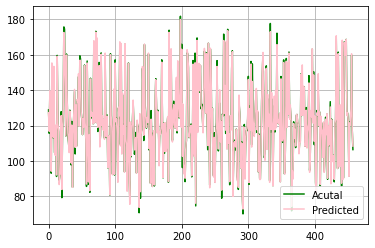

In [24]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'green', label = 'Acutal')
plt.plot(y_pred, color = 'pink', label = 'Predicted')
plt.grid(4.5)
plt.legend()
plt.show()
